In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

<p>Generate 20 data points.</p>

In [2]:
x = torch.Tensor(np.random.uniform(0, 1, 20))
n = torch.Tensor(np.random.normal(0, 1, 20))
y = torch.Tensor(np.sin(2*np.pi*x) + 0.1*n)

<p>Split into 10 train and 10 test data points. </p>

In [3]:
train_x = x[:10]
train_y = y[:10]

test_x = x[10:]
test_y = y[10:]

<p>Define our models: zero order, first order, third order, and ninth order regression. </p>

In [4]:
class ZeroOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
  
  def forward(self, x):
    return self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w0.grad.data.zero_()
      self.total_loss = self.total_loss/len(train_x)
      #print("training progress: ", epoch, self.total_loss.data[0])

In [5]:
class FirstOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w1 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
  
  def forward(self, x):
    return self.w1*x + self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w1.data = self.w1.data - 0.01*self.w1.grad.data
        self.w0.grad.data.zero_()
        self.w1.grad.data.zero_()
      
      self.total_loss = self.total_loss/len(train_x)
      #print("training progress: ", epoch, self.total_loss.data[0])

In [6]:
class ThirdOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w1 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w2 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w3 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
  
  def forward(self, x):
    return self.w3*x*x*x + self.w2*x*x + self.w1*x + self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w1.data = self.w1.data - 0.01*self.w1.grad.data
        self.w2.data = self.w2.data - 0.01*self.w2.grad.data
        self.w3.data = self.w3.data - 0.01*self.w3.grad.data
        self.w0.grad.data.zero_()
        self.w1.grad.data.zero_()
        self.w2.grad.data.zero_()
        self.w3.grad.data.zero_()

      self.total_loss = self.total_loss/len(train_x)
      #print("training progress: ", epoch, self.total_loss.data[0])

In [7]:
class NinthOrder(torch.nn.Module):
  def __init__(self):
    self.w0 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w1 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w2 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w3 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w4 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w5 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w6 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w7 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w8 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.w9 = Variable(torch.Tensor([1.0]), requires_grad=True)
    self.total_loss = 0
  
  def forward(self, x):
    return self.w9*x**9 + self.w8*x**8 + self.w7*x**7 + self.w6*x**6 + self.w5*x**5 + self.w4*x**4 + self.w3*x**3 + self.w2*x*x + self.w1*x + self.w0
  
  def loss(self, x, y):
    y_pred = self.forward(x)
    return (y_pred - y) * (y_pred - y)

  def train(self, epochs, train_x, train_y):
    for epoch in range(epochs):
      self.total_loss = 0
      for x_val, y_val in zip(train_x, train_y):
        l = self.loss(x_val, y_val)
        self.total_loss += l.data.numpy()
        l.backward()

        self.w0.data = self.w0.data - 0.01*self.w0.grad.data
        self.w1.data = self.w1.data - 0.01*self.w1.grad.data
        self.w2.data = self.w2.data - 0.01*self.w2.grad.data
        self.w3.data = self.w3.data - 0.01*self.w3.grad.data
        self.w4.data = self.w4.data - 0.01*self.w4.grad.data
        self.w5.data = self.w5.data - 0.01*self.w5.grad.data
        self.w6.data = self.w6.data - 0.01*self.w6.grad.data
        self.w7.data = self.w7.data - 0.01*self.w7.grad.data
        self.w8.data = self.w8.data - 0.01*self.w8.grad.data
        self.w9.data = self.w9.data - 0.01*self.w9.grad.data
        self.w0.grad.data.zero_()
        self.w1.grad.data.zero_()
        self.w2.grad.data.zero_()
        self.w3.grad.data.zero_()
        self.w4.grad.data.zero_()
        self.w5.grad.data.zero_()
        self.w6.grad.data.zero_()
        self.w7.grad.data.zero_()
        self.w8.grad.data.zero_()
        self.w9.grad.data.zero_()
      
      self.total_loss = self.total_loss/len(train_x)
      #print("training progress: ", epoch, self.total_loss.data[0])

<p>Now we train our models. </p>

In [8]:
zero_model = ZeroOrder()
first_model = FirstOrder()
third_model = ThirdOrder()
ninth_model = NinthOrder()

In [9]:
zero_model.train(100, train_x, train_y)
print("Train Loss:", zero_model.total_loss)

Train Loss: [0.4045598]


In [10]:
first_model.train(100, train_x, train_y)
print("Train Loss:", first_model.total_loss)

Train Loss: [0.22542839]


In [11]:
third_model.train(100, train_x, train_y)
print("Train Loss:", third_model.total_loss)

Train Loss: [0.19418941]


In [12]:
ninth_model.train(100, train_x, train_y)
print("Train Loss:", ninth_model.total_loss)

Train Loss: [0.12169985]


<p>Visualize the results, starting with the zero order model. </p>

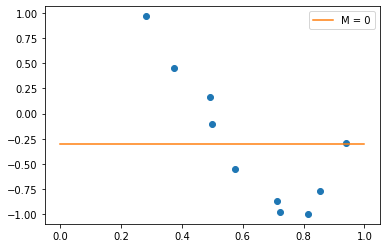

In [13]:
X = np.linspace(0,1,100)
preds = []
for x in X:
  preds.append(zero_model.forward(x).detach())

plt.plot(train_x, train_y, 'o')
plt.plot(X, preds, label="M = 0")
plt.legend()
plt.show()

<p>Next, generate predictions with the model on the test data set and calculate the mean squared error. </p>

In [14]:
def test_loss(model):
  test_preds = []
  test_loss = 0
  for i in range(len(test_x)):
    test_preds.append(model.forward(test_x[i]).detach())
    test_loss += (test_preds[i] - test_y[i])*(test_preds[i] - test_y[i])
  test_loss = test_loss.detach().numpy()/len(test_x)
  print("Test Loss:", test_loss)
  
  return test_loss
  
zero_test_loss = test_loss(zero_model)

Test Loss: [0.7786877]


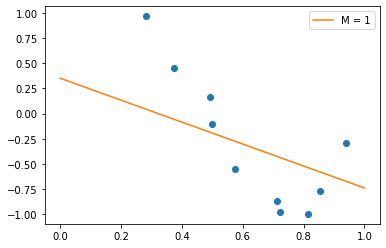

In [15]:
X = np.linspace(0,1,100)
preds = []
for x in X:
  preds.append(first_model.forward(x).detach())

plt.plot(train_x, train_y, 'o')
plt.plot(X, preds, label="M = 1")
plt.legend()
plt.show()

In [16]:
test_loss(first_model)

Test Loss: [0.39195135]


array([0.39195135], dtype=float32)

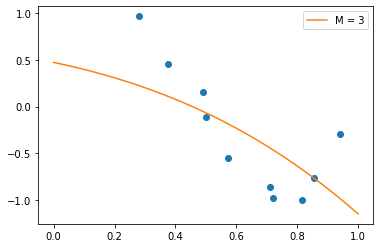

In [17]:
X = np.linspace(0,1,100)
preds = []
for x in X:
  preds.append(third_model.forward(x).detach())
plt.plot(train_x, train_y, 'o')
plt.plot(X, preds, label="M = 3")
plt.legend()
plt.show()

In [18]:
test_loss(third_model)

Test Loss: [0.25649422]


array([0.25649422], dtype=float32)

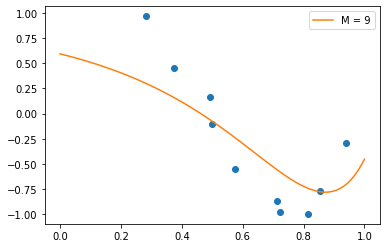

In [19]:
X = np.linspace(0,1,100)
preds = []
for x in X:
  preds.append(ninth_model.forward(x).detach())
plt.plot(train_x, train_y, 'o')
plt.plot(X, preds, label="M = 9")
plt.legend()
plt.show()

In [20]:
test_loss(ninth_model)

Test Loss: [0.19677587]


array([0.19677587], dtype=float32)